estudo CBOW. Vamos montar uma matriz documento X palavras. Vamos utilizar dicionarios para isso. Alem disso, vamos fazer todas as etapas de procesamento.

Parte inicial eh percorrer os documentos no direorio e concatenar todos em um vetor.


In [38]:
import glob # biblioteca que permite percorrer os arquivos no diretorio

files=glob.glob("DocCol1/*")
print (files)

['DocCol1/music3.txt', 'DocCol1/Futb3.txt', 'DocCol1/music1.txt', 'DocCol1/Futb1.txt', 'DocCol1/Futb2.txt', 'DocCol1/music2.txt']


criar string docs, percorrer cada arquivo, ler e concatenar o conteudo em docs como string

In [39]:
docs=''
for fname in files:
  with open(fname,'r') as f: # with eh funcao garante usar arquivo com seguranca e fechara apos a acao. Open abre o arquivo e r vai ler. a saida vai ser guardada em f.
    docs = docs + ''+f.read() # todos os documentos concatenados em dosc

In [40]:
docs

'Livros sobre técnica musical que vão ajudar seus estudos\nConfira algumas leituras essenciais para quem deseja melhorar ainda mais suas habilidades na música.\n20 de Março de 2024, às 12:00\nPor Cifra Club\nCompartilhar no Facebook\nCompartilhar no Twitter\nCopiar link\nNos siga no\nPara dominar um instrumento e expressar todo o seu potencial musical, é essencial ir além da intuição e do talento natural. Pensando nisso, trouxemos uma lista de livros sobre técnica musical que vão te auxiliar nos estudos!\n\nA teoria musical fornece as ferramentas e conhecimentos necessários para aprimorar suas habilidades, expandir seu repertório e se conectar com a música. Então confira alguns títulos que vão te ajudar nessa jornada!\n\n5 livros sobre técnica musical para aprofundar os estudos\nAtravés do estudo da técnica, o músico aprimora sua precisão, desenvolve sua fluidez e conquista a liberdade de se expressar.\n\nSe você deseja avançar nos seus estudos e desenvolver suas habilidades na música,

Etapa de tokenizar as palavras - separar palavra a palavra. separar simbolos e etc. Nessa etapa, a string de docs passar a ser um array apos o processo.

In [41]:
import nltk # ferramenta que transforma string em lista de palavras
nltk.download('punkt') # punkt eh a funcao da biblioteca ja pre treinado para apoiar na separacao  textos em frases e frases  em palavras. isso porque ele ja consegue identificar ponto, objetos, palavras  etc.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [42]:
words= nltk.word_tokenize(docs, language='portuguese')# word_tokenize efetivamente separa texto, frases vai nivel de palavras.
print (words[20:])


['habilidades', 'na', 'música', '.', '20', 'de', 'Março', 'de', '2024', ',', 'às', '12:00', 'Por', 'Cifra', 'Club', 'Compartilhar', 'no', 'Facebook', 'Compartilhar', 'no', 'Twitter', 'Copiar', 'link', 'Nos', 'siga', 'no', 'Para', 'dominar', 'um', 'instrumento', 'e', 'expressar', 'todo', 'o', 'seu', 'potencial', 'musical', ',', 'é', 'essencial', 'ir', 'além', 'da', 'intuição', 'e', 'do', 'talento', 'natural', '.', 'Pensando', 'nisso', ',', 'trouxemos', 'uma', 'lista', 'de', 'livros', 'sobre', 'técnica', 'musical', 'que', 'vão', 'te', 'auxiliar', 'nos', 'estudos', '!', 'A', 'teoria', 'musical', 'fornece', 'as', 'ferramentas', 'e', 'conhecimentos', 'necessários', 'para', 'aprimorar', 'suas', 'habilidades', ',', 'expandir', 'seu', 'repertório', 'e', 'se', 'conectar', 'com', 'a', 'música', '.', 'Então', 'confira', 'alguns', 'títulos', 'que', 'vão', 'te', 'ajudar', 'nessa', 'jornada', '!', '5', 'livros', 'sobre', 'técnica', 'musical', 'para', 'aprofundar', 'os', 'estudos', 'Através', 'do', '

### Remocao simbolos e caracter

agora, ja com a lista de tudo que esta inserido nos textos, temos que retirar os simbolos e caracteres. o pacote string do python eh bom para isso.

In [43]:
import string

no item abaixo, vamos recriar uma lista word, fazendo algumas etapas:
1. w.lower() - ele ira colocar todas as palavras no minusculo. para impedir que acha divergencia entre maiusculo e minusculo. Obs: ao usar w.lower() for w in words ele esta passando for de cada palavra e fazendo isso.

2. condicao para atividade de cima, ele vai fazer isso para todoas as palavras que forem alpha numerico, ou seja, w.isalpha() retorna true caso esteja com todas as letras no conjunto alphanumerico.

outra condicao do if eh: e que nao estiverem na lista string.ascii_letters que eh lista completa de letras do alphabeto. nesse caso evita de ter letras isoladas, soltas.



In [44]:
words = [w.lower() for w in words if w.isalpha() and w not in string.ascii_letters]

### removendo stopwords.
como iremos fazer analise semantica, do sentido dos textos, existem palavras que nao contribuem ou atrapalham a analise. como artigos, preposicoes e etc. sao chamadas stopwords e devem ser retiradas.


In [45]:
from nltk.corpus import stopwords
nltk.download ('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
stop_words=stopwords.words('portuguese') # lista de palavras da biblioteca stopwords que iremso retirar do nosso proejto
print(stop_words[20:])
print(stop_words[:20])

['deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvéssemos', 'isso', 'isto', 'já', 'lhe', 'lhes', 'mais', 'mas', 'me', 'mesmo', 'meu', 'meus', 'minha', 'minhas', 'muito', 'na', 'não', 'nas', 'nem', 'no', 'nos

In [47]:
words=[w for w in words if w not in stop_words] # cria-se nova lista selecionando so palavras que nao estiverem no stopwords.
print(words[20:])
print(words[:20])


['facebook', 'compartilhar', 'twitter', 'copiar', 'link', 'siga', 'dominar', 'instrumento', 'expressar', 'todo', 'potencial', 'musical', 'essencial', 'ir', 'além', 'intuição', 'talento', 'natural', 'pensando', 'nisso', 'trouxemos', 'lista', 'livros', 'sobre', 'técnica', 'musical', 'vão', 'auxiliar', 'estudos', 'teoria', 'musical', 'fornece', 'ferramentas', 'conhecimentos', 'necessários', 'aprimorar', 'habilidades', 'expandir', 'repertório', 'conectar', 'música', 'então', 'confira', 'alguns', 'títulos', 'vão', 'ajudar', 'nessa', 'jornada', 'livros', 'sobre', 'técnica', 'musical', 'aprofundar', 'estudos', 'através', 'estudo', 'técnica', 'músico', 'aprimora', 'precisão', 'desenvolve', 'fluidez', 'conquista', 'liberdade', 'expressar', 'deseja', 'avançar', 'estudos', 'desenvolver', 'habilidades', 'música', 'conheça', 'seguir', 'seleção', 'livros', 'sobre', 'técnica', 'musical', 'teoria', 'música', 'bohumil', 'med', 'considerado', 'referência', 'iniciantes', 'estudantes', 'avançados', 'teori

### bigramas e trigramas

Algumas palavras juntas possuem grande valor semantico por isso eh importante que elas fiquem juntas para melhorar o aprendizado. como seguda-feira, etc.e tambem serve para entender comportamentos de textos que se repetem, como "eu goto","cifra club", etc. para isso eh feito calculo que demonstra a frequencia com que estao cada vez mais juntas. e preserva-las

 "maioria absoluta" ou "solução rápida", onde as palavras têm uma relação de coocorrência mais forte do que seria esperado por acaso.

In [48]:
from nltk.collocations import * # subpacote para manipular n-grams

In [49]:
bigram_measures=nltk.collocations.BigramAssocMeasures() #BigramAssocMeasures possui um monte de funcao de medidas de bigramas. consegue analisar freqeucnai de cada bigrama
# consegue tambem ver texto

Medidas de Associação
A classe BigramAssocMeasures fornece várias medidas para avaliar a força da associação entre bigramas. Algumas das medidas incluem:

likelihood_ratio: A razão de verossimilhança.
chi_sq: O teste do qui-quadrado.
pmi: A Pointwise Mutual Information (Informação Mútua Pontual).

In [50]:
# agora eh preciso encontrar esses bigrams dentro do texot com o finder
finder=BigramCollocationFinder.from_words(words)


In [51]:
#vamos percorrer o array com os bigramas encontrados
for i in finder.nbest(bigram_measures.raw_freq,20): # selecionar aqueles melhores -best que possui frequencia bruta acima de 20 bgrams
  words.append(i[0].lower()+' '+i[1].lower()) # nessa etapa ela inclui na nossa lista words todos os bigramas encontrados em formato minusculo.
print(words[-10:]) #

['artificial chega', 'cata coll', 'cifra club', 'conceitos fundamentais', 'escalas acordes', 'escolas música', 'estudar música', 'exercícios leitura', 'henrique pinto', 'iniciação violão']


###Processo de normalizao lexica

pode ser stemming ou lematizacao. Informações e conceitos sobre _Lematização_ podem ser encontrados [aqui](https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk)

Abaixo seguiremos com stemming que nada mais eh que Stemming:

Método: Reduz palavras à raiz removendo sufixos e prefixos de forma agressiva.Palavras originais: ['Os', 'gatos', 'estão', 'caminhando', 'pelas', 'ruas', 'e', 'se', 'divertindo', '.']
Palavras stemizadas com PorterStemmer: ['o', 'gato', 'est', 'caminhand', 'pel', 'ru', 'e', 'se', 'divert', '.']

lematizacao - preocupase em trazer a palavra forma mais natural, para verbos por exemplo
ira  converter  verbos em sua forma no infinituvo:
ando, andando, andei, andarei $\longrightarrow$ andar

O pacote <font color='blue'>nltk</font> possui o método <font color='blue'>PorterStemmer</font> que executa o steeming das palavras.

In [52]:
from nltk.stem import PorterStemmer


In [53]:
#words = [PorterStemmer().stem(w) for w in words]

print(words[:100])

['livros', 'sobre', 'técnica', 'musical', 'vão', 'ajudar', 'estudos', 'confira', 'algumas', 'leituras', 'essenciais', 'deseja', 'melhorar', 'ainda', 'habilidades', 'música', 'março', 'cifra', 'club', 'compartilhar', 'facebook', 'compartilhar', 'twitter', 'copiar', 'link', 'siga', 'dominar', 'instrumento', 'expressar', 'todo', 'potencial', 'musical', 'essencial', 'ir', 'além', 'intuição', 'talento', 'natural', 'pensando', 'nisso', 'trouxemos', 'lista', 'livros', 'sobre', 'técnica', 'musical', 'vão', 'auxiliar', 'estudos', 'teoria', 'musical', 'fornece', 'ferramentas', 'conhecimentos', 'necessários', 'aprimorar', 'habilidades', 'expandir', 'repertório', 'conectar', 'música', 'então', 'confira', 'alguns', 'títulos', 'vão', 'ajudar', 'nessa', 'jornada', 'livros', 'sobre', 'técnica', 'musical', 'aprofundar', 'estudos', 'através', 'estudo', 'técnica', 'músico', 'aprimora', 'precisão', 'desenvolve', 'fluidez', 'conquista', 'liberdade', 'expressar', 'deseja', 'avançar', 'estudos', 'desenvolver

saida:
'sobr', 'técnica', 'music', 'vão', 'leitura', 'essenciai',


perceba que a saida cortou as palavras ao ines de coloca-las no infinitivo, isso ocorre pois essa tecnica eh mais avancada para o ingles e nao portugues, vamos saltar a funcao acima reprocessr o codigo para words volte a ter suas palavras como eram antes e vamos usar outra tecnica que parece melhor adapatda ao portugues.


In [54]:
from nltk.stem import RSLPStemmer

In [55]:
import nltk
nltk.download('rslp')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [56]:
#stemmer=RSLPStemmer()

In [57]:
#words_test=[stemmer.stem(w) for w in words]
#print(words_test[:100])

tambem resultado ficou ruim, porque stemmer corta as palavras e tem risco de criar paralavrs inexistesntes.
vamos tentar com lematizacao.

In [58]:
pip install spacy

In [59]:
!python3 -m spacy download pt_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 27.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [60]:
import spacy # ferramenta de lematizacao


In [61]:
#carregar modelo em portugues
nlp=spacy.load('pt_core_news_sm')

In [62]:
words_test=[nlp(w) for w in words]
print(words_test[:100])
print(words[:100])


[livros, sobre, técnica, musical, vão, ajudar, estudos, confira, algumas, leituras, essenciais, deseja, melhorar, ainda, habilidades, música, março, cifra, club, compartilhar, facebook, compartilhar, twitter, copiar, link, siga, dominar, instrumento, expressar, todo, potencial, musical, essencial, ir, além, intuição, talento, natural, pensando, nisso, trouxemos, lista, livros, sobre, técnica, musical, vão, auxiliar, estudos, teoria, musical, fornece, ferramentas, conhecimentos, necessários, aprimorar, habilidades, expandir, repertório, conectar, música, então, confira, alguns, títulos, vão, ajudar, nessa, jornada, livros, sobre, técnica, musical, aprofundar, estudos, através, estudo, técnica, músico, aprimora, precisão, desenvolve, fluidez, conquista, liberdade, expressar, deseja, avançar, estudos, desenvolver, habilidades, música, conheça, seguir, seleção, livros, sobre, técnica, musical, teoria]
['livros', 'sobre', 'técnica', 'musical', 'vão', 'ajudar', 'estudos', 'confira', 'algumas

o resultado parece nao funcionar tbm. entao vamos usar o mesmo do prfessor



In [63]:
words = [PorterStemmer().stem(w) for w in words]

print(words[:100])

['livro', 'sobr', 'técnica', 'music', 'vão', 'ajudar', 'estudo', 'confira', 'alguma', 'leitura', 'essenciai', 'deseja', 'melhorar', 'ainda', 'habilidad', 'música', 'março', 'cifra', 'club', 'compartilhar', 'facebook', 'compartilhar', 'twitter', 'copiar', 'link', 'siga', 'dominar', 'instrumento', 'expressar', 'todo', 'potenci', 'music', 'essenci', 'ir', 'além', 'intuição', 'talento', 'natur', 'pensando', 'nisso', 'trouxemo', 'lista', 'livro', 'sobr', 'técnica', 'music', 'vão', 'auxiliar', 'estudo', 'teoria', 'music', 'fornec', 'ferramenta', 'conhecimento', 'necessário', 'aprimorar', 'habilidad', 'expandir', 'repertório', 'conectar', 'música', 'então', 'confira', 'algun', 'título', 'vão', 'ajudar', 'nessa', 'jornada', 'livro', 'sobr', 'técnica', 'music', 'aprofundar', 'estudo', 'atravé', 'estudo', 'técnica', 'músico', 'aprimora', 'precisão', 'desenvolv', 'fluidez', 'conquista', 'liberdad', 'expressar', 'deseja', 'avançar', 'estudo', 'desenvolv', 'habilidad', 'música', 'conheça', 'seguir'

formacao dos dicionarios. abaixo segue a importacao da biblioteca de contagem para usar no dicionario.

As etapas anteriores serviram como exemplo detalhado de como fazer pre processameto. E foi feito concatenando todos os arquivos e tudo que havia sido escrito dentro de uma so variavel.  

Agora, nessa etapa eh necessario que facamos um loop iterativo para que cada processo seja feito e seja colocado referenciado pelo aqrquivo a que se pertenca para fazermso um dicionaio.



In [64]:
from collections import Counter

In [65]:
ddocs = {}# cricao variavel difcionario


In [75]:
for fname in files: # passar por cada arquivo e resgaar o nome deles
    key = fname.split('/')[-1]  # rotulo do documento, salvar em Key
    with open(fname,'r') as f:
      doc=f.read()
      words=nltk.word_tokenize(doc,language='portuguese')
      words=[w.lower() for w in words if w.isalpha()]
      words=[w for w in words if w not in stop_words]
      words=[PorterStemmer().stem(w) for w in words]
      # no mesom loop acessar cada palavra dentro de word e contar a sua frequencia e formar dicionario com ela
      ddocs[key] = dict(Counter(words))

In [76]:
ddocs.keys()

dict_keys(['music3.txt', 'Futb3.txt', 'music1.txt', 'Futb1.txt', 'Futb2.txt', 'music2.txt'])

In [77]:
list(ddocs.keys())

['music3.txt',
 'Futb3.txt',
 'music1.txt',
 'Futb1.txt',
 'Futb2.txt',
 'music2.txt']

In [78]:
list(ddocs.keys())[1]

'Futb3.txt'

In [79]:
ddocs[list(ddocs.keys())[1]]

{'pentacampeão': 1,
 'invest': 1,
 'inteligência': 8,
 'artifici': 9,
 'chega': 3,
 'futebol': 5,
 'faz': 1,
 'peneira': 4,
 'vídeo': 5,
 'folhapress': 1,
 'atualizado': 1,
 'futebolinteligência': 1,
 'foto': 1,
 'iconsport': 1,
 'cada': 1,
 'vez': 1,
 'present': 2,
 'cotidiano': 1,
 'pessoa': 3,
 'realidad': 1,
 'mundo': 2,
 'plataforma': 7,
 'tecnologia': 2,
 'têm': 2,
 'surgido': 1,
 'promessa': 1,
 'facilitar': 1,
 'vida': 1,
 'olheiro': 3,
 'clube': 5,
 'filtrando': 1,
 'catalogando': 1,
 'habilidad': 1,
 'joven': 5,
 'atravé': 2,
 'cadastrado': 2,
 'próprio': 1,
 'jogador': 1,
 'precisem': 1,
 'fisicament': 1,
 'avaliação': 1,
 'funciona': 1,
 'ia': 8,
 'missão': 1,
 'democratizar': 1,
 'oportunidad': 4,
 'algun': 1,
 'recebem': 1,
 'volum': 2,
 'grand': 1,
 'conteúdo': 1,
 'ainda': 3,
 'assim': 2,
 'restrito': 1,
 'muita': 2,
 'veze': 2,
 'região': 1,
 'distant': 1,
 'remota': 1,
 'consegu': 2,
 'chegar': 1,
 'ter': 3,
 'visibilidad': 1,
 'amplia': 1,
 'visão': 1,
 'globalment':

In [80]:
ddocs

{'music3.txt': {'livro': 9,
  'sobr': 5,
  'técnica': 8,
  'music': 17,
  'vão': 4,
  'ajudar': 3,
  'estudo': 8,
  'confira': 2,
  'alguma': 1,
  'leitura': 8,
  'essenciai': 1,
  'deseja': 4,
  'melhorar': 1,
  'ainda': 1,
  'habilidad': 4,
  'música': 8,
  'março': 1,
  'cifra': 3,
  'club': 3,
  'compartilhar': 2,
  'facebook': 1,
  'twitter': 1,
  'copiar': 1,
  'link': 1,
  'siga': 1,
  'dominar': 1,
  'instrumento': 3,
  'expressar': 2,
  'todo': 3,
  'potenci': 1,
  'essenci': 1,
  'ir': 1,
  'além': 2,
  'intuição': 1,
  'talento': 1,
  'natur': 1,
  'pensando': 1,
  'nisso': 1,
  'trouxemo': 1,
  'lista': 1,
  'auxiliar': 1,
  'teoria': 11,
  'fornec': 1,
  'ferramenta': 2,
  'conhecimento': 2,
  'necessário': 1,
  'aprimorar': 2,
  'expandir': 1,
  'repertório': 1,
  'conectar': 1,
  'então': 1,
  'algun': 2,
  'título': 1,
  'nessa': 1,
  'jornada': 2,
  'aprofundar': 1,
  'atravé': 4,
  'músico': 3,
  'aprimora': 1,
  'precisão': 1,
  'desenvolv': 4,
  'fluidez': 1,
  'con

A variável `ddocs` é um dicionário onde cada chave é o nome de um documento e o valor correspondente é um outro dicionário, cuja chave é uma palavra relevante do documento e o valor o número de ocorrências da palavra no documeto. Ou seja:
```
{
    'Doc1' : {p1: np1, p2:np2,...}
    'Doc2' : {p1: np1, p5:np2,...}
      :
      :
}
```

na proxima etapa havera a construcao lista com as palavras, essa lista de palavras sera usada no cabecalho do data frame. ( rotulo).
colunas do DataFrame Documentos X Palavras


In [83]:
ddocs.values()

dict_values([{'livro': 9, 'sobr': 5, 'técnica': 8, 'music': 17, 'vão': 4, 'ajudar': 3, 'estudo': 8, 'confira': 2, 'alguma': 1, 'leitura': 8, 'essenciai': 1, 'deseja': 4, 'melhorar': 1, 'ainda': 1, 'habilidad': 4, 'música': 8, 'março': 1, 'cifra': 3, 'club': 3, 'compartilhar': 2, 'facebook': 1, 'twitter': 1, 'copiar': 1, 'link': 1, 'siga': 1, 'dominar': 1, 'instrumento': 3, 'expressar': 2, 'todo': 3, 'potenci': 1, 'essenci': 1, 'ir': 1, 'além': 2, 'intuição': 1, 'talento': 1, 'natur': 1, 'pensando': 1, 'nisso': 1, 'trouxemo': 1, 'lista': 1, 'auxiliar': 1, 'teoria': 11, 'fornec': 1, 'ferramenta': 2, 'conhecimento': 2, 'necessário': 1, 'aprimorar': 2, 'expandir': 1, 'repertório': 1, 'conectar': 1, 'então': 1, 'algun': 2, 'título': 1, 'nessa': 1, 'jornada': 2, 'aprofundar': 1, 'atravé': 4, 'músico': 3, 'aprimora': 1, 'precisão': 1, 'desenvolv': 4, 'fluidez': 1, 'conquista': 1, 'liberdad': 1, 'avançar': 1, 'conheça': 1, 'seguir': 1, 'seleção': 2, 'bohumil': 3, 'med': 3, 'considerado': 1, 'r

In [81]:
corpus=[]
for v in ddocs.values():  #valores do dicionario serao palavras e sua quantidade, como usou .values nao aparece key que eh arquivo
  corpus.extend(list(v.keys())) # como usvou .values, nesse contexto v.keys eh cada palavra desconsiderando nuemro da frequencia.
  # dai ele cria lista que eh anexada a lista corpus com apoio da funca extend.

In [82]:
corpus

['livro',
 'sobr',
 'técnica',
 'music',
 'vão',
 'ajudar',
 'estudo',
 'confira',
 'alguma',
 'leitura',
 'essenciai',
 'deseja',
 'melhorar',
 'ainda',
 'habilidad',
 'música',
 'março',
 'cifra',
 'club',
 'compartilhar',
 'facebook',
 'twitter',
 'copiar',
 'link',
 'siga',
 'dominar',
 'instrumento',
 'expressar',
 'todo',
 'potenci',
 'essenci',
 'ir',
 'além',
 'intuição',
 'talento',
 'natur',
 'pensando',
 'nisso',
 'trouxemo',
 'lista',
 'auxiliar',
 'teoria',
 'fornec',
 'ferramenta',
 'conhecimento',
 'necessário',
 'aprimorar',
 'expandir',
 'repertório',
 'conectar',
 'então',
 'algun',
 'título',
 'nessa',
 'jornada',
 'aprofundar',
 'atravé',
 'músico',
 'aprimora',
 'precisão',
 'desenvolv',
 'fluidez',
 'conquista',
 'liberdad',
 'avançar',
 'conheça',
 'seguir',
 'seleção',
 'bohumil',
 'med',
 'considerado',
 'referência',
 'iniciant',
 'estudant',
 'avançado',
 'oferec',
 'introdução',
 'abrangent',
 'nele',
 'aprend',
 'conceito',
 'fundamentai',
 'nota',
 'escala

vamos retirar valores repetidos.

In [84]:
corpus = list(set(corpus))# ao usar o set vc retira todas as duplicadas.
print(corpus[:10])

['pontuaçõ', 'essenci', 'água', 'conduzem', 'insight', 'companheiro', 'liga', 'futebolinteligência', 'básico', 'dinâmica']



construcao do data frame

In [85]:
import pandas as pd
import numpy as np

In [88]:
rows = list(ddocs.keys())
rows

['music3.txt',
 'Futb3.txt',
 'music1.txt',
 'Futb1.txt',
 'Futb2.txt',
 'music2.txt']

In [92]:
BoW = pd.DataFrame(data=np.zeros((len(rows),len(corpus))),
                   columns=corpus,index=rows,dtype=int)

#data frame cheio de zeros, tamanho linhas igual tamnho do arquivo e colunas igual das palabrasd, rotulos de coluna e linhas tbm

In [93]:
BoW

,pontuaçõ,essenci,água,conduzem,insight,companheiro,liga,futebolinteligência,básico,dinâmica,...,descrita,dez,capacidad,chelsea,garantia,simpl,precisa,ativaçõ,tópico,universo
music3.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Futb3.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
music1.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Futb1.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Futb2.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
music2.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


preenchendo cada celula com valores do dicionario.

In [94]:
ddocs.keys()

dict_keys(['music3.txt', 'Futb3.txt', 'music1.txt', 'Futb1.txt', 'Futb2.txt', 'music2.txt'])

In [99]:
list(ddocs['music3.txt'].keys())

['livro',
 'sobr',
 'técnica',
 'music',
 'vão',
 'ajudar',
 'estudo',
 'confira',
 'alguma',
 'leitura',
 'essenciai',
 'deseja',
 'melhorar',
 'ainda',
 'habilidad',
 'música',
 'março',
 'cifra',
 'club',
 'compartilhar',
 'facebook',
 'twitter',
 'copiar',
 'link',
 'siga',
 'dominar',
 'instrumento',
 'expressar',
 'todo',
 'potenci',
 'essenci',
 'ir',
 'além',
 'intuição',
 'talento',
 'natur',
 'pensando',
 'nisso',
 'trouxemo',
 'lista',
 'auxiliar',
 'teoria',
 'fornec',
 'ferramenta',
 'conhecimento',
 'necessário',
 'aprimorar',
 'expandir',
 'repertório',
 'conectar',
 'então',
 'algun',
 'título',
 'nessa',
 'jornada',
 'aprofundar',
 'atravé',
 'músico',
 'aprimora',
 'precisão',
 'desenvolv',
 'fluidez',
 'conquista',
 'liberdad',
 'avançar',
 'conheça',
 'seguir',
 'seleção',
 'bohumil',
 'med',
 'considerado',
 'referência',
 'iniciant',
 'estudant',
 'avançado',
 'oferec',
 'introdução',
 'abrangent',
 'nele',
 'aprend',
 'conceito',
 'fundamentai',
 'nota',
 'escala

In [98]:
list(ddocs['music3.txt'].values())

[9,
 5,
 8,
 17,
 4,
 3,
 8,
 2,
 1,
 8,
 1,
 4,
 1,
 1,
 4,
 8,
 1,
 3,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 2,
 3,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 11,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 4,
 3,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 3,
 1,
 1,
 2,
 3,
 1,
 2,
 2,
 1,
 1,
 2,
 4,
 3,
 1,
 2,
 2,
 7,
 3,
 2,
 2,
 1,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 6,
 2,
 3,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 5,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 5,
 4,
 3,
 3,
 1,
 3,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 2,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

para polupar temos ter qtencao que devemos setar algumas coisas,

ferramentas .loc voce se posiciona em determinado elemento dado linha e coluna.

In [100]:
for k in ddocs.keys():#passando cada elemento das chaves do dicionario.
   BoW.loc[k, list(ddocs[k].keys())] = list(ddocs[k].values()) # em outras palavras diz que no data set na posicao da linha tal e da coluna tal preencher com valores da linha tal
BoW.head()


,pontuaçõ,essenci,água,conduzem,insight,companheiro,liga,futebolinteligência,básico,dinâmica,...,descrita,dez,capacidad,chelsea,garantia,simpl,precisa,ativaçõ,tópico,universo
music3.txt,0,1,0,1,0,0,0,0,2,0,...,0,0,1,0,0,1,1,0,0,0
Futb3.txt,1,0,0,0,1,0,0,1,0,0,...,0,1,0,5,0,0,1,1,0,2
music1.txt,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Futb1.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Futb2.txt,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
frequency=BoW.sum(axis=0) #somou cada linha
smaller=1.0
larger=0.9*BoW.shape[0]

In [105]:
BoW.shape[0]

6

In [112]:
s_mask= (frequency<=smaller) | (frequency>= larger)
s_mask

,0
pontuaçõ,True
essenci,False
água,True
conduzem,True
insight,True
...,...
simpl,True
precisa,False
ativaçõ,True
tópico,True


In [114]:
words_to_remove= frequency[s_mask].index.values
words_to_remove

array(['pontuaçõ', 'água', 'conduzem', 'insight', 'companheiro', 'liga',
       'futebolinteligência', 'dinâmica', 'vingou', 'viajar', 'ml',
       'recorrent', 'vez', 'brasil', 'lanc', 'promovem', 'ajudar',
       'olímpico', 'valioso', 'lucca', 'região', 'esport',
       'indiscutivelment', 'adotado', 'modelo', 'contribuiçõ', 'qualidad',
       'passo', 'madrugada', 'contrat', 'atravé', 'protagoniz', 'copinha',
       'irmão', 'áustria', 'catálogo', 'ingredient', 'renom', 'físico',
       'filtrando', 'irlandê', 'diss', 'produção', 'enfrenta', 'marcant',
       'conquista', 'ordenação', 'abrang', 'desvendar', 'imag', 'major',
       'alia', 'caso', 'técnico', 'modal', 'italiano', 'inglesa', 'sobr',
       'intervalo', 'precisem', 'constant', 'democratizar', 'coreia',
       'entrou', 'prefaceia', 'folclórica', 'bom', 'embaixo',
       'curiosidad', 'sempr', 'utiliza', 'jiménez', 'disso', 'advertis',
       'vend', 'nunca', 'i', 'segunda', 'cheio', 'avançado', 'mexicano',
       'deu'

In [115]:
m= BoW.shape[1]
BoW=BoW.drop(words_to_remove,axis=1) #removeu todas as colunas
print('Foram removidas',m-BoW.shape[1],'palavras')

Foram removidas 651 palavras


### Visualizando os documentos
Uma das aplicações interessantes de PCA é utilizar uma Bag of Words para encontrar tópicos associados aos documentos. A ideia é que palavras dentro de um mesmo tópico tendem a estar correlacionadas na Bag of Words e tais correlações tendem a ser capturadas pelas direções principais.

In [116]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

docid = {}
for i,c in enumerate(BoW.index.values):
   if c[0:2] not in docid:              # as duas letras iniciais do indice indicam o
      docid[c[0:2]] = i                 # tópico ao qual o documento está relacionado
                                        # docid armazena como chave o tópico e valor
print(docid)                            # a linha onde aparece pela primeira vez


{'mu': 0, 'Fu': 1}


In [117]:
doc_ids = [docid[c[0:2]] for c in BoW.index.values] # cria uma lista de labels indicando
                                                    # a qual topico o documento pertence.
                                                    # Os labels serão utilizados para colorir
                                                    # os documentos de acordo com seu tópico
X = BoW.values
X = StandardScaler().fit_transform(X)               # Aplica uma normalização Z-score
                                                    # nos dados para melhorar o resultado do PCA

pca_obj = PCA(n_components=2)
Xpca = pca_obj.fit_transform(X)

print(Xpca.shape)

#BoW.to_csv('bag_of_words_4.csv')

(6, 2)


In [120]:
Xpca[:,0]

array([ 18.34172678, -12.83186293,  -1.80144869,  -3.68623796,
        -2.10119598,   2.07901878])

In [121]:
Xpca[:,1]

array([ 8.05590637, 13.58059337, -9.67027216, -3.69938288, -3.02250013,
       -5.24434457])

[0 1]


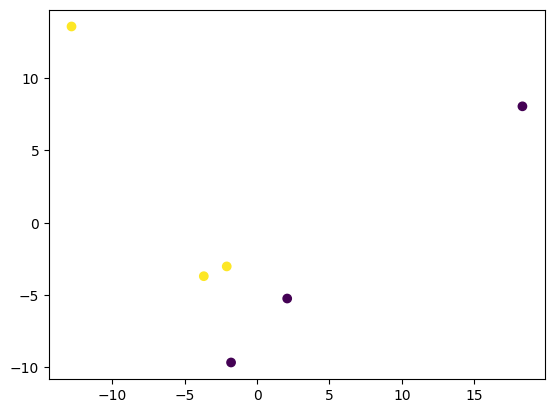

In [122]:
import matplotlib.pyplot as plt
%matplotlib inline

print(np.unique(doc_ids))
plt.scatter(Xpca[:,0],Xpca[:,1],c=doc_ids)

## Term Frequency and Inverse Document Frequency (TF-IDF)
TF-IDF é uma técnica para quantificar a importância das palavra nos documentos.

**Nomenclatura**:
- t — palavra
- d — documento (conjunto de palavras)
- N — número de documentos

#### TF
TF mede a frequência de uma palavra em um documento. TF depende muito do tamanho do documento e da generalidade da palavra.

$$
TF(t,d)= \frac{\# t \mbox{ em } d}{\#\mbox{ palavras em } d}
$$

onde $t$ é uma palavra e $d$ um documento.

#### IDF
IDF mede o quão informativa cada palavra é no conjunto de documentos. Uma palavra que aparece frequentemente em muitos documentos não é útil para discriminar os documentos, portanto seu IDF deve ser próximo de zero.

$$
IDF(t) = \frac{N}{\# t \mbox{ em todos os documentos}}
$$

onde $N$ é o número de documentos no corpus.

Combinando as duas métricas temos o chamado TF-IDF:

$$
TFIDF(t,d) = TF(t,d)*\log(IDF(t))
$$


In [124]:
X = BoW.values

# calculando o IDF das palavras
X_idf = X.shape[0]/np.sum(X,axis=0) #linhas
print(X_idf.shape)

(284,)


In [125]:
# calculando TF de palavras em cada documento
X_tf = np.apply_along_axis(lambda x: x/np.sum(x>0),1,X)
print(X_tf.shape)


(6, 284)


In [126]:
# calculando TF-IDF
X_tfidf = np.apply_along_axis(lambda x: x*np.log(X_idf),1,X_tf)
print(X_tfidf.shape)


(6, 284)


In [127]:
M = (X_tfidf<0)   # valores negativos são zerados
X_tfidf[M] = 0.0

(6, 2)


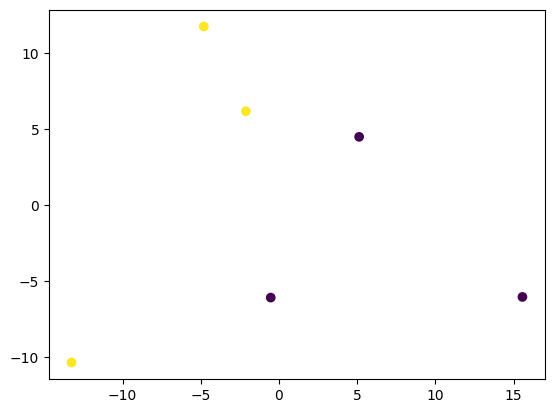

In [128]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X_tfidf)

pca_obj = PCA(n_components=2)
Xpca = pca_obj.fit_transform(X)

print(Xpca.shape)

fig, ax = plt.subplots()
plt.scatter(Xpca[:,0],Xpca[:,1],c=doc_ids)

In [129]:
# gerando um data frame com a BoW usando TFIDF
df_out = pd.DataFrame(data=X_tfidf,columns=BoW.columns.values,index=rows)

df_out.to_csv('bag_of_words_4.csv',index=True)

In [130]:
df_out

,essenci,básico,alguma,henriqu,guitarrista,woltzenlogel,dica,med,time,aprofundar,...,seleção,método,ano,nota,violonista,guia,oficiai,chelsea,precisa,universo
music3.txt,0.009637,0.019274,0.006080,0.018241,0.007997,0.000000,0.000000,0.010670,0.000000,0.009637,...,0.003199,0.009637,0.000000,0.006080,0.014227,0.019274,0.000000,0.000000,0.006080,0.000000
Futb3.txt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008029,0.000000,...,0.001805,0.000000,0.005415,0.000000,0.000000,0.000000,0.000000,0.009026,0.006863,0.021755
music1.txt,0.000000,0.000000,0.014146,0.000000,0.000000,0.000000,0.022421,0.004137,0.000000,0.011210,...,0.000000,0.000000,0.000000,0.007073,0.000000,0.000000,0.000000,0.000000,0.007073,0.000000
Futb1.txt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017629,0.000000,...,0.007927,0.000000,0.007927,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Futb2.txt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
music2.txt,0.014846,0.000000,0.000000,0.000000,0.000000,0.029692,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.014846,0.000000,0.009367,0.000000,0.000000,0.029692,0.000000,0.000000,0.000000


In [123]:
BoW.values

array([[1, 2, 1, ..., 0, 1, 0],
       [0, 0, 0, ..., 5, 1, 2],
       [0, 0, 2, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [118]:
doc_ids

[0, 1, 0, 1, 1, 0]

In [132]:
git init


SyntaxError: invalid syntax (<ipython-input-132-f188d5ac1197>, line 1)